# Data Science & Business Analyst Intern from The Sparks Foundation

![](Task-1.jpg)

# Author:    D.Sathyakala

    Dateset Link: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv 

#  Objective:
     To predict the percentage of marks that a student is expected to score basedon  number of hours studie..

In [27]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
!pip3 install statsmodels

In [28]:
# Read the data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [46]:
# Get the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [47]:
# Correlation 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [48]:
# Splitting the dataset independent and dependent values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [49]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [50]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

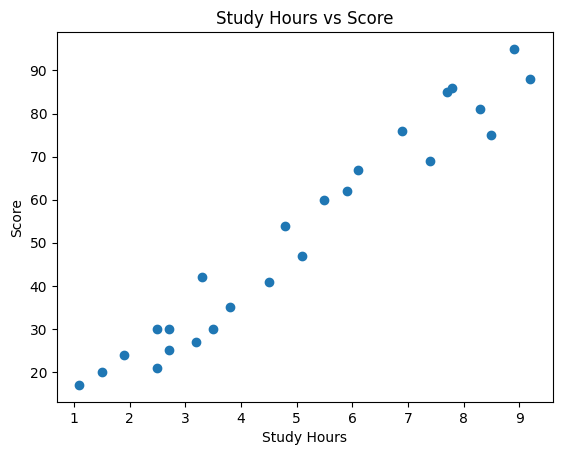

In [51]:
# plot the variables
plt.scatter(X, y)
plt.title('Study Hours vs Score')
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()
     

In [52]:
# Split the dataset as training and testing datas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [53]:
# X_train: The features for the training set.
# X_test: The features for the test set.
# y_train: The target variable for the training set.
# y_test: The target variable for the test set.
X_train, X_test, y_train, y_test

(array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]),
 array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64),
 array([20, 27, 69, 30, 62], dtype=int64))

In [54]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [38]:
# Predictions
y_pred = model.predict(X)
y_pred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

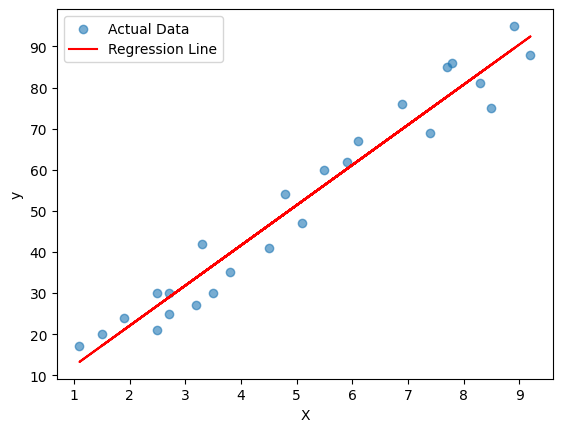

In [39]:
# Scatter plot of the data points
plt.scatter(X, y, alpha=0.6, label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()


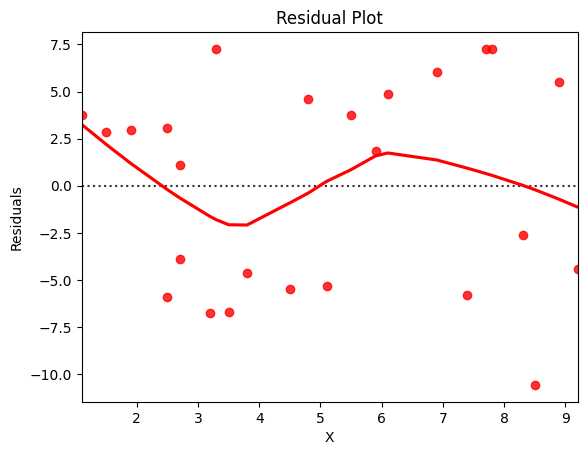

In [40]:
# Calculate residuals
residuals = y - y_pred

# Residual plot
sns.residplot(x=X.flatten(), y=residuals.flatten(), lowess=True, color="r")
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
print(model.predict([[9.25]]))

[93.69173249]


In [43]:
y_pred = model.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('The Prediction Score on Testset is\n', r2)

The Prediction Score on Testset is
 0.9454906892105355


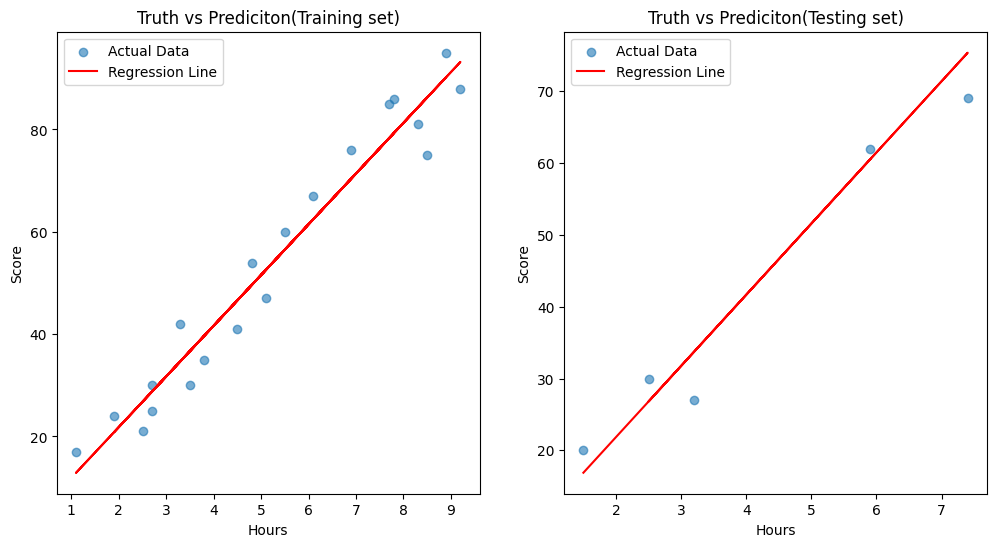

In [45]:
plt.figure(figsize = (12, 6))

# Scatter plot of the data points
plt.subplot(1,2,1)
plt.scatter(X_train, y_train, alpha=0.6, label='Actual Data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Truth vs Prediciton(Training set)', fontsize = 12)
plt.legend()

# Scatter plot of the data points
plt.subplot(1,2,2)
plt.scatter(X_test, y_test, alpha=0.6, label='Actual Data')

# Plot the regression line
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Truth vs Prediciton(Testing set)', fontsize = 12)
plt.legend()

# Show the plot
plt.show()
